In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nolds
import numpy as np

In [2]:
df = pd.read_csv('btc.csv')
df.head()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["date"] = df["date"].astype("datetime64")
df = df.set_index("date")

In [4]:
price2021 = df[df.index.year == 2021]['PriceUSD']

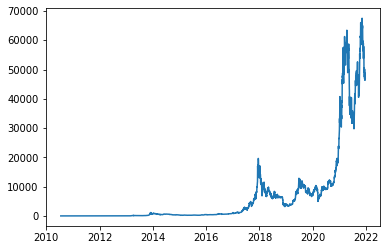

In [5]:
plt.figure()
plt.plot(df['PriceUSD'])

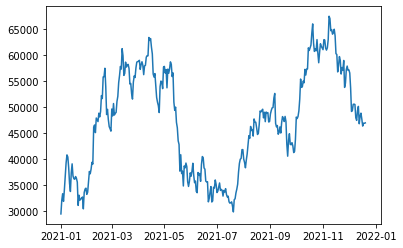

In [6]:
plt.figure()
plt.plot(price2021)

### Sample Entropy

Low values means the series is regular and predicatble.

Let's start by analyzing the entropy for a completely random dataset:

In [7]:
randomDf = np.random.random(size=len(price2021))
nolds.sampen(randomDf)

2.159036922126052

Its value is 2.2 so pretty high.

Let's find out what's the SampEn value for Bitcoin price in 2021: 

In [8]:
nolds.sampen(price2021)

0.6033316389333855

Pretty low compared to random. It lowers even further when considering BTC close price since 2011:

In [9]:
nolds.sampen(df[df.index.year >= 2011]['PriceUSD'])

0.007457171744891045

<AxesSubplot:xlabel='date'>

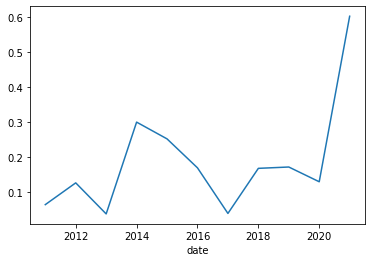

In [10]:
# TODO plot sampen for each year, considering all previous years (since 2011)
df['PriceUSD'].groupby(df.index.year).apply(nolds.sampen).plot()

### Lyapunov exponent

In [11]:
lyape = nolds.lyap_e(price2021)
sum = 0
for i in range(0,len(lyape)):
    if lyape[i] > 0:
        sum += lyape[i]
sum

0.09008588315919042

In [12]:
randU = np.random.choice([85.0, 80.0, 89.0], size=17 * 3)
nolds.lyap_e(randU)

array([-0.11164535, -0.10609838, -0.14628269, -0.19698374], dtype=float32)

In [13]:
nolds.sampen(randU)

1.0394234172777792

### Hurst exponent

0.5 is white noise, a greater value means positive dependency on previous data, lower than 0.5 a negative dependency.

<AxesSubplot:xlabel='date'>

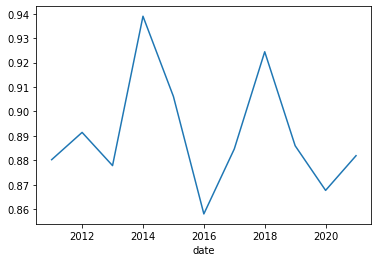

In [14]:
df['PriceUSD'].groupby(df.index.year).apply(nolds.hurst_rs).plot()

At each year we have a positive dependency.

In [15]:
nolds.hurst_rs(df[df.index.year >= 2011]['PriceUSD'])

0.9554426265206137

this holds if we consider all data from 2011.